In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

Policy Iteration

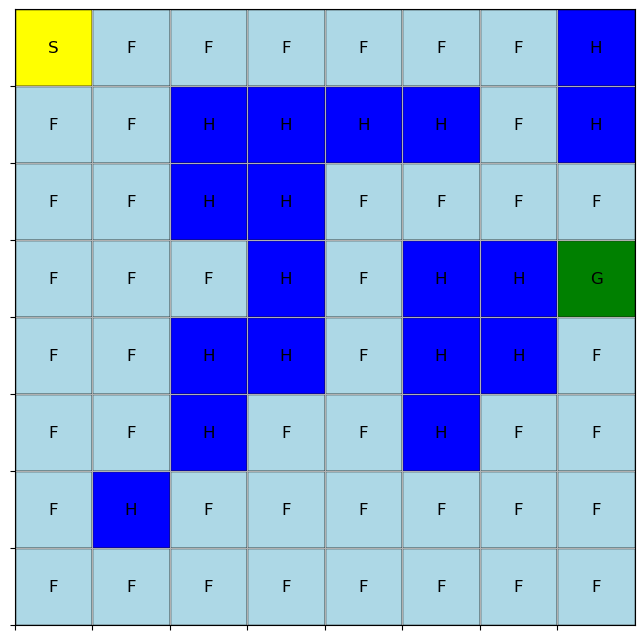

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# تعریف نقشه سفارشی
map = [
    "SFFFFFFH",
    "FFHHHHFH",
    "FFHHFFFF",
    "FFFHFHHG",
    "FFHHFHHF",
    "FFHFFHFF",
    "FHFFFFFF",
    "FFFFFFFF",
]

# ایجاد تابعی برای نمایش نقشه
def plot_frozenlake_map(frozenlake_map):
    n = len(frozenlake_map)
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for i in range(n):
        for j in range(n):
            cell = frozenlake_map[i][j]
            if cell == 'S':
                color = 'yellow'  # شروع
            elif cell == 'F':
                color = 'lightblue'  # مسیر قابل حرکت
            elif cell == 'H':
                color = 'blue'  # چاله
            elif cell == 'G':
                color = 'green'  # هدف
            rect = plt.Rectangle([j, n-i-1], 1, 1, facecolor=color, edgecolor='black')
            ax.add_patch(rect)
            ax.text(j + 0.5, n-i-1 + 0.5, cell, ha='center', va='center', fontsize=12)
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    ax.set_xticks(np.arange(0, n, 1))
    ax.set_yticks(np.arange(0, n, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    plt.show()

# نمایش نقشه اولیه
plot_frozenlake_map(map)


Q-Learning


C:\Users\skipy2050\AppData\Roaming\Python\Python311\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment FrozenLakeNotSlippery-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\skipy2050\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 5000 completed with total reward: 0.0
Episode 10000 completed with total reward: 0.0
Episode 15000 completed with total reward: 0.0
Episode 20000 completed with total reward: 0.0
Episode 25000 completed with total reward: 0.0
Episode 30000 completed with total reward: 0.0
Episode 35000 completed with total reward: 0.0
Episode 40000 completed with total reward: 0.0
Episode 45000 completed with total reward: 0.0
Episode 50000 completed with total reward: 0.0
Episode 55000 completed with total reward: 0.0
Episode 60000 completed with total reward: 0.0
Episode 65000 completed with total reward: 0.0
Episode 70000 completed with total reward: 0.0
Episode 75000 completed with total reward: 0.0
Episode 80000 completed with total reward: 0.0
Episode 85000 completed with total reward: 0.0
Episode 90000 completed with total reward: 0.0
Episode 95000 completed with total reward: 0.0
Episode 100000 completed with total reward: 0.0
Final Q-Table:
[[0.59869818 0.56876327 0.63020861 0.59869818

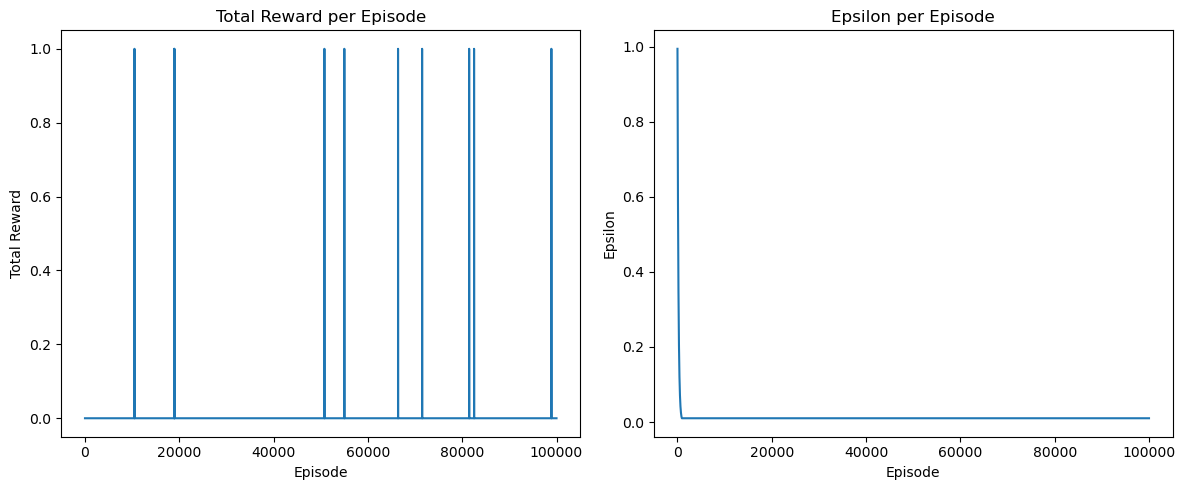

Results saved to 'q_learning_results.xlsx'


In [2]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

# ایجاد محیط با مشخص کردن render_mode
env = gym.make('FrozenLakeNotSlippery-v0')

# پارامترهای الگوریتم Q-Learning
alpha = 0.8  # نرخ یادگیری
gamma = 0.95  # ضریب تخفیف
epsilon = 1.0  # ضریب اکتشاف اولیه
epsilon_decay = 0.995  # نرخ کاهش ضریب اکتشاف
min_epsilon = 0.01  # حداقل ضریب اکتشاف
episodes = 100000  # تعداد قسمت‌ها
max_steps = 100  # حداکثر تعداد قدم‌ها در هر قسمت

# مقداردهی اولیه جدول Q
Q = np.zeros((env.observation_space.n, env.action_space.n))

# ذخیره نتایج
rewards = []
epsilons = []

# تابع انتخاب اکشن با استفاده از سیاست ε-greedy
def choose_action(state, epsilon, visited_states):
    if np.random.rand() < epsilon or state in visited_states:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

# اجرای الگوریتم Q-Learning
for episode in range(episodes):
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state  # افزودن این خط برای حالت‌های tuple
    total_reward = 0
    visited_states = set()  # حافظه بازدید برای ذخیره حالت‌های بازدید شده
    
    for step in range(max_steps):
        visited_states.add(state)  # اضافه کردن حالت فعلی به حافظه بازدید
        action = choose_action(state, epsilon, visited_states)
        next_state, reward, done, _, _ = env.step(action)
        
        # به‌روزرسانی Q-Table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        
        state = next_state
        total_reward += reward
        
        if done:
            break
    
    # کاهش ضریب اکتشاف
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    
    # ذخیره مجموع پاداش‌ها و ضریب اکتشاف
    rewards.append(total_reward)
    epsilons.append(epsilon)
    
    # چاپ اطلاعات مربوط به هر 5000 قسمت
    if (episode + 1) % 5000 == 0:
        print(f"Episode {episode + 1} completed with total reward: {total_reward}")

# چاپ Q-Table نهایی
print("Final Q-Table:")
print(Q)

# نمایش سیاست بهینه
optimal_policy = np.argmax(Q, axis=1).reshape(8, 8)
actions = ["←", "↓", "→", "↑"]
print("Optimal Policy:")
for row in optimal_policy:
    print(" ".join([actions[action] for action in row]))

# رسم نمودارها
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')

plt.subplot(1, 2, 2)
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon per Episode')

plt.tight_layout()
plt.show()

# ذخیره نتایج در فایل اکسل
results_df = pd.DataFrame({'Episode': range(1, episodes + 1), 'Total Reward': rewards, 'Epsilon': epsilons})
results_df.to_excel('q_learning_results.xlsx', index=False)
print("Results saved to 'q_learning_results.xlsx'")


SARSA

Episode 500 completed with total reward: 0.0
Episode 1000 completed with total reward: 0.0
Episode 1500 completed with total reward: 0.0
Episode 2000 completed with total reward: 0.0
Episode 2500 completed with total reward: 0.0
Episode 3000 completed with total reward: 0.0
Episode 3500 completed with total reward: 0.0
Episode 4000 completed with total reward: 0.0
Episode 4500 completed with total reward: 0.0
Episode 5000 completed with total reward: 0.0
Episode 5500 completed with total reward: 0.0
Episode 6000 completed with total reward: 0.0
Episode 6500 completed with total reward: 0.0
Episode 7000 completed with total reward: 0.0
Episode 7500 completed with total reward: 0.0
Episode 8000 completed with total reward: 0.0
Episode 8500 completed with total reward: 0.0
Episode 9000 completed with total reward: 0.0
Episode 9500 completed with total reward: 0.0
Episode 10000 completed with total reward: 0.0
Episode 10500 completed with total reward: 0.0
Episode 11000 completed with tota

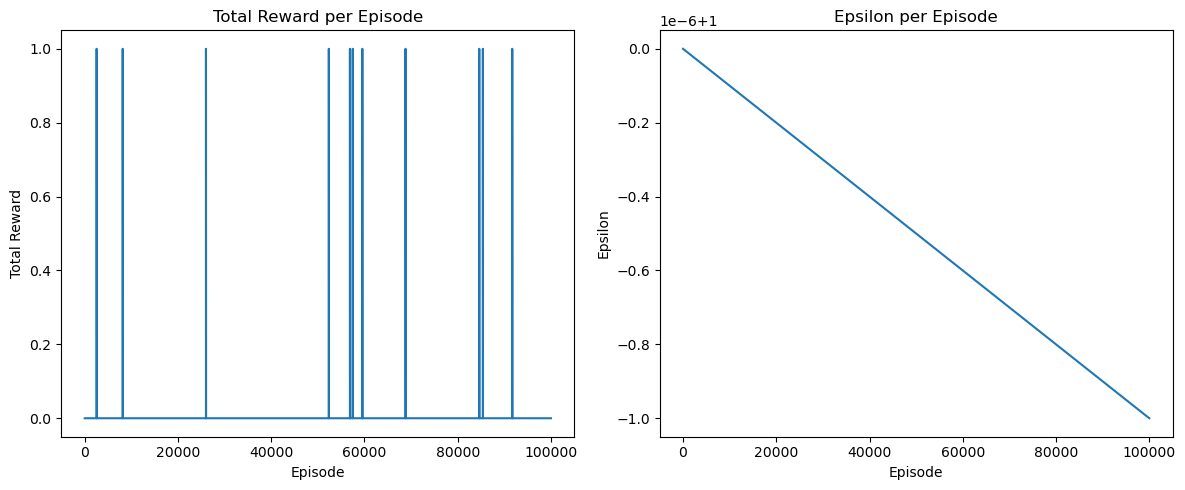

Results saved to 'sarsa_results.xlsx'


In [3]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

# ایجاد محیط
env = gym.make('FrozenLakeNotSlippery-v0')

# پارامترهای الگوریتم SARSA
alpha = 0.8  # نرخ یادگیری
gamma = 0.95  # ضریب تخفیف
epsilon = 1.0  # ضریب اکتشاف اولیه
epsilon_decay = 0.99999999999  # نرخ کاهش ضریب اکتشاف
min_epsilon = 0.01  # حداقل ضریب اکتشاف
episodes = 100000  # تعداد قسمت‌ها
max_steps = 100  # حداکثر تعداد قدم‌ها در هر قسمت

# مقداردهی اولیه جدول Q
Q = np.zeros((env.observation_space.n, env.action_space.n))

# ذخیره نتایج
rewards = []
epsilons = []

# تابع انتخاب اکشن با استفاده از سیاست ε-greedy
def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

# اجرای الگوریتم SARSA
for episode in range(episodes):
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state  # افزودن این خط برای حالت‌های tuple
    total_reward = 0
    
    action = choose_action(state, epsilon)
    
    for step in range(max_steps):
        next_state, reward, done, _, _ = env.step(action)
        next_state = next_state if isinstance(next_state, int) else next_state[0]
        next_action = choose_action(next_state, epsilon)
        
        # به‌روزرسانی Q-Table با استفاده از SARSA
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        state = next_state
        action = next_action
        total_reward += reward
        
        if done:
            break
    
    # کاهش ضریب اکتشاف
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    
    # ذخیره مجموع پاداش‌ها و ضریب اکتشاف
    rewards.append(total_reward)
    epsilons.append(epsilon)
    
    # چاپ اطلاعات مربوط به هر 500 قسمت
    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1} completed with total reward: {total_reward}")

# چاپ Q-Table نهایی
print("Final Q-Table:")
print(Q)

# نمایش سیاست بهینه
optimal_policy = np.argmax(Q, axis=1).reshape(8, 8)
actions = ["←", "↓", "→", "↑"]
print("Optimal Policy:")
for row in optimal_policy:
    print(" ".join([actions[action] for action in row]))

# رسم نمودارها
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')

plt.subplot(1, 2, 2)
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon per Episode')

plt.tight_layout()
plt.show()

# ذخیره نتایج در فایل اکسل
results_df = pd.DataFrame({'Episode': range(1, episodes + 1), 'Total Reward': rewards, 'Epsilon': epsilons})
results_df.to_excel('sarsa_results.xlsx', index=False)
print("Results saved to 'sarsa_results.xlsx'")


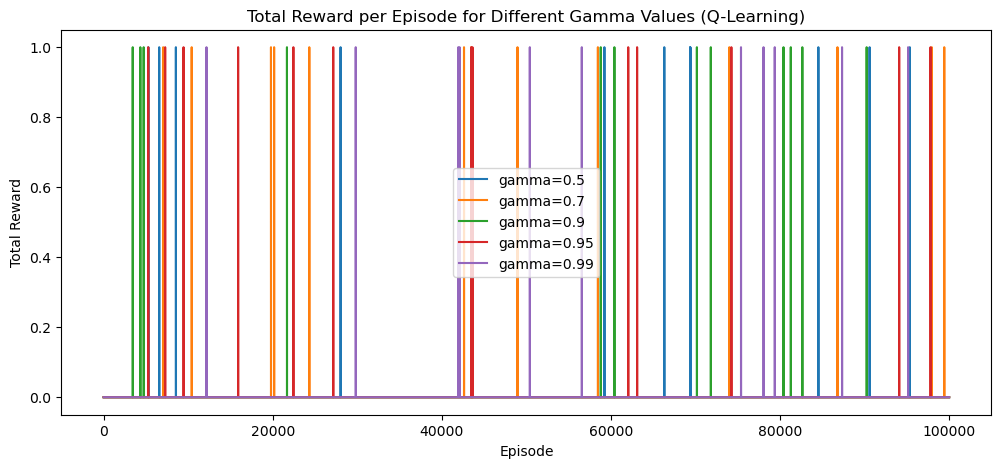

In [4]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

# ایجاد محیط با مشخص کردن render_mode
env = gym.make('FrozenLakeNotSlippery-v0')

# پارامترهای الگوریتم Q-Learning
alpha = 0.8  # نرخ یادگیری
epsilon = 1.0  # ضریب اکتشاف اولیه
epsilon_decay = 0.995  # نرخ کاهش ضریب اکتشاف
min_epsilon = 0.01  # حداقل ضریب اکتشاف
episodes = 100000  # تعداد قسمت‌ها
max_steps = 100  # حداکثر تعداد قدم‌ها در هر قسمت

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]
results_q_learning = []

for gamma in gamma_values:
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon, visited_states):
        if np.random.rand() < epsilon or state in visited_states:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0
        visited_states = set()

        for step in range(max_steps):
            visited_states.add(state)
            action = choose_action(state, epsilon, visited_states)
            next_state, reward, done, _, _ = env.step(action)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    results_q_learning.append({'gamma': gamma, 'rewards': rewards, 'epsilons': epsilons})

# رسم نمودارها برای هر ضریب تخفیف
plt.figure(figsize=(12, 5))
for result in results_q_learning:
    plt.plot(result['rewards'], label=f'gamma={result["gamma"]}')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Gamma Values (Q-Learning)')
plt.legend()
plt.show()


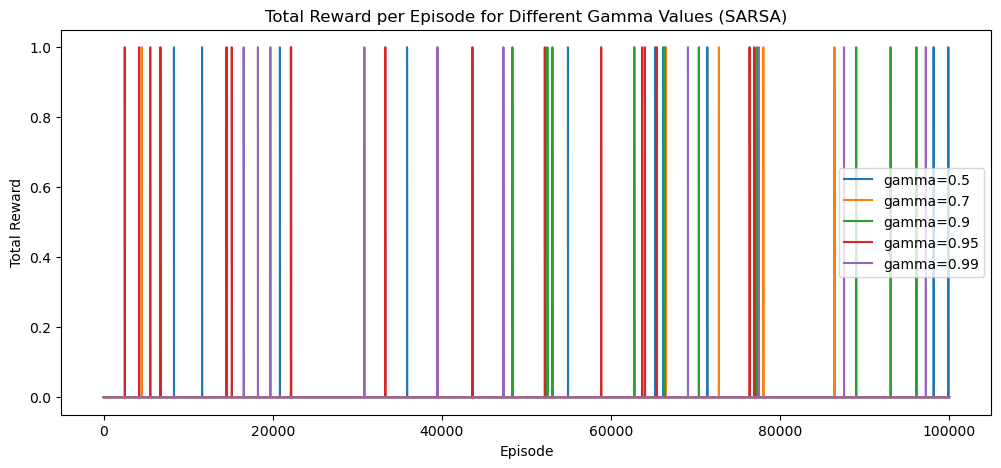

In [6]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

# ایجاد محیط
env = gym.make('FrozenLakeNotSlippery-v0')

# پارامترهای الگوریتم SARSA
alpha = 0.8  # نرخ یادگیری
epsilon = 1.0  # ضریب اکتشاف اولیه
epsilon_decay = 0.99999999999  # نرخ کاهش ضریب اکتشاف
min_epsilon = 0.01  # حداقل ضریب اکتشاف
episodes = 100000  # تعداد قسمت‌ها
max_steps = 100  # حداکثر تعداد قدم‌ها در هر قسمت

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]
results_sarsa = []

for gamma in gamma_values:
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0

        action = choose_action(state, epsilon)

        for step in range(max_steps):
            next_state, reward, done, _, _ = env.step(action)
            next_state = next_state if isinstance(next_state, int) else next_state[0]
            next_action = choose_action(next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    results_sarsa.append({'gamma': gamma, 'rewards': rewards, 'epsilons': epsilons})

# رسم نمودارها برای هر ضریب تخفیف
plt.figure(figsize=(12, 5))
for result in results_sarsa:
    plt.plot(result['rewards'], label=f'gamma={result["gamma"]}')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Gamma Values (SARSA)')
plt.legend()
plt.show()


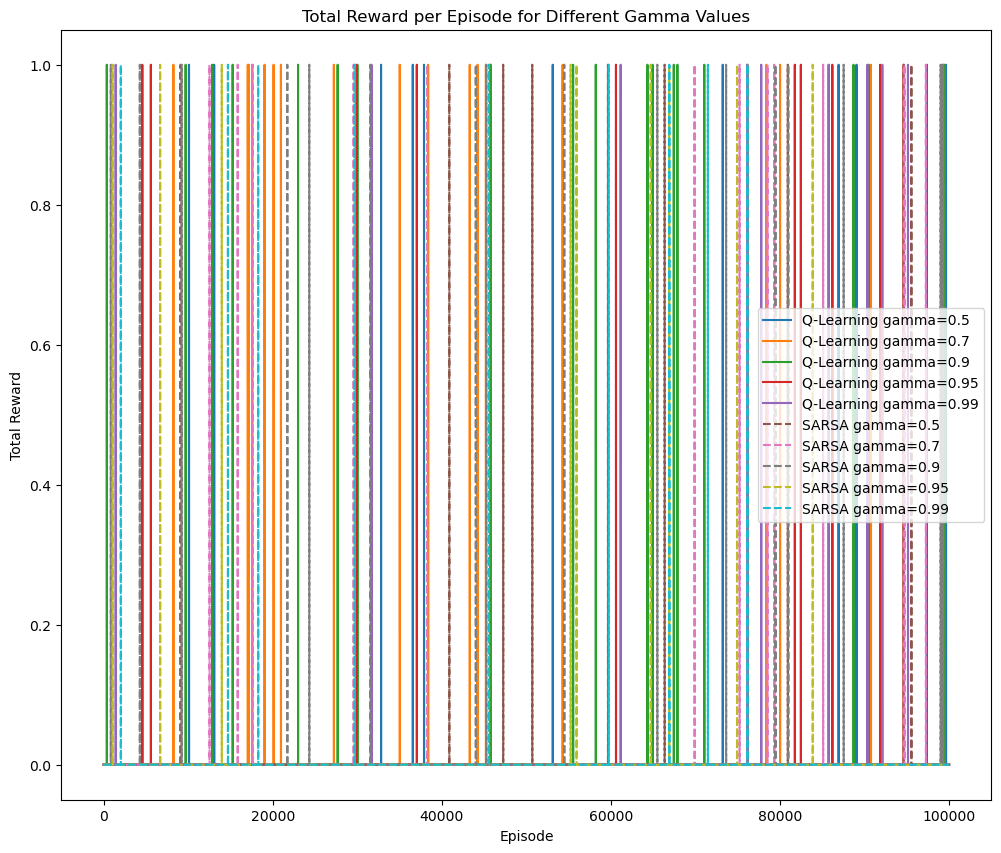

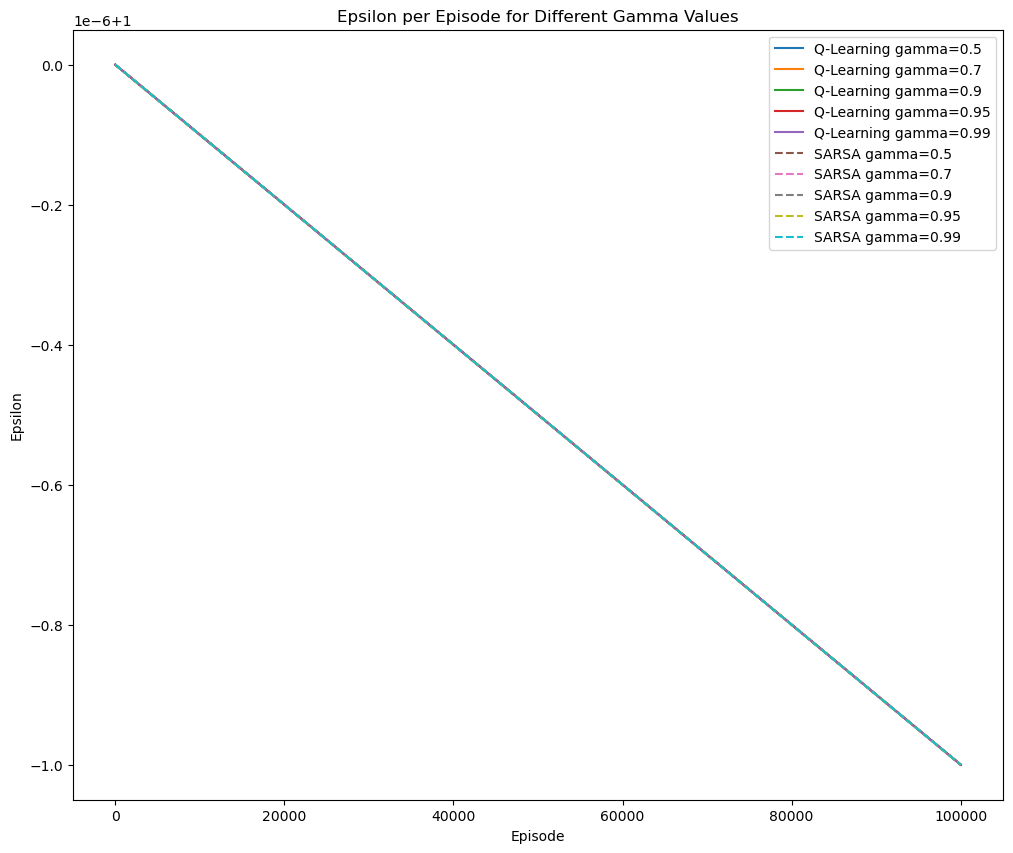

In [8]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

# ایجاد محیط
env = gym.make('FrozenLakeNotSlippery-v0')

# پارامترهای الگوریتم
alpha = 0.8  # نرخ یادگیری
epsilon = 1.0  # ضریب اکتشاف اولیه
epsilon_decay = 0.99999999999  # نرخ کاهش ضریب اکتشاف
min_epsilon = 0.01  # حداقل ضریب اکتشاف
episodes = 100000  # تعداد قسمت‌ها
max_steps = 100  # حداکثر تعداد قدم‌ها در هر قسمت

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]

# اجرای الگوریتم Q-Learning
results_q_learning = []

for gamma in gamma_values:
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon, visited_states):
        if np.random.rand() < epsilon or state in visited_states:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0
        visited_states = set()

        for step in range(max_steps):
            visited_states.add(state)
            action = choose_action(state, epsilon, visited_states)
            next_state, reward, done, _, _ = env.step(action)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    results_q_learning.append({'gamma': gamma, 'rewards': rewards, 'epsilons': epsilons})

# اجرای الگوریتم SARSA
results_sarsa = []

for gamma in gamma_values:
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0

        action = choose_action(state, epsilon)

        for step in range(max_steps):
            next_state, reward, done, _, _ = env.step(action)
            next_state = next_state if isinstance(next_state, int) else next_state[0]
            next_action = choose_action(next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    results_sarsa.append({'gamma': gamma, 'rewards': rewards, 'epsilons': epsilons})

# رسم نمودارهای پاداش انباشته برای Q-Learning و SARSA
plt.figure(figsize=(12, 10))
for result in results_q_learning:
    plt.plot(result['rewards'], label=f'Q-Learning gamma={result["gamma"]}')
for result in results_sarsa:
    plt.plot(result['rewards'], label=f'SARSA gamma={result["gamma"]}', linestyle='dashed')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Gamma Values')
plt.legend()
plt.savefig('total_rewards_comparison.png')  # ذخیره نمودار به صورت فایل تصویری
plt.show()

# رسم نمودارهای ضریب اکتشاف برای Q-Learning و SARSA
plt.figure(figsize=(12, 10))
for result in results_q_learning:
    plt.plot(result['epsilons'], label=f'Q-Learning gamma={result["gamma"]}')
for result in results_sarsa:
    plt.plot(result['epsilons'], label=f'SARSA gamma={result["gamma"]}', linestyle='dashed')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon per Episode for Different Gamma Values')
plt.legend()
plt.savefig('epsilon_comparison.png')  # ذخیره نمودار به صورت فایل تصویری
plt.show()


In [13]:
# پارامترهای الگوریتم
alpha = 0.8  # نرخ یادگیری
epsilon = 1.0  # ضریب اکتشاف اولیه
epsilon_decay = 0.99999999999  # نرخ کاهش ضریب اکتشاف
min_epsilon = 0.01  # حداقل ضریب اکتشاف
episodes = 100000  # تعداد قسمت‌ها
max_steps = 100  # حداکثر تعداد قدم‌ها در هر قسمت

#gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]


In [14]:
# ثبت محیط جدید Frozen Lake با نقشه سفارشی و slippery=True
register(
    id='FrozenLakeSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': True}
)

# ایجاد محیط با slippery=True
env_slippery = gym.make('FrozenLakeSlippery-v0')

# اجرای الگوریتم Q-Learning در محیط slippery=True
results_q_learning_slippery = []

for gamma in gamma_values:
    Q = np.zeros((env_slippery.observation_space.n, env_slippery.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon, visited_states):
        if np.random.rand() < epsilon or state in visited_states:
            return env_slippery.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env_slippery.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0
        visited_states = set()

        for step in range(max_steps):
            visited_states.add(state)
            action = choose_action(state, epsilon, visited_states)
            next_state, reward, done, _, _ = env_slippery.step(action)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    results_q_learning_slippery.append({'gamma': gamma, 'rewards': rewards, 'epsilons': epsilons})


C:\Users\skipy2050\AppData\Roaming\Python\Python311\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment FrozenLakeSlippery-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [15]:
# اجرای الگوریتم SARSA در محیط slippery=True
results_sarsa_slippery = []

for gamma in gamma_values:
    Q = np.zeros((env_slippery.observation_space.n, env_slippery.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon):
        if np.random.rand() < epsilon:
            return env_slippery.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env_slippery.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0

        action = choose_action(state, epsilon)

        for step in range(max_steps):
            next_state, reward, done, _, _ = env_slippery.step(action)
            next_state = next_state if isinstance(next_state, int) else next_state[0]
            next_action = choose_action(next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    results_sarsa_slippery.append({'gamma': gamma, 'rewards': rewards, 'epsilons': epsilons})


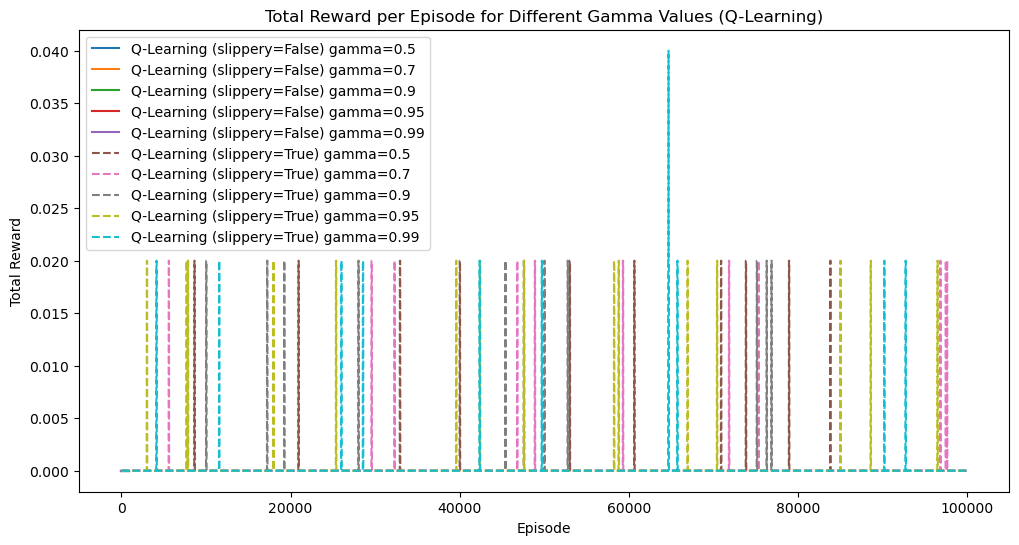

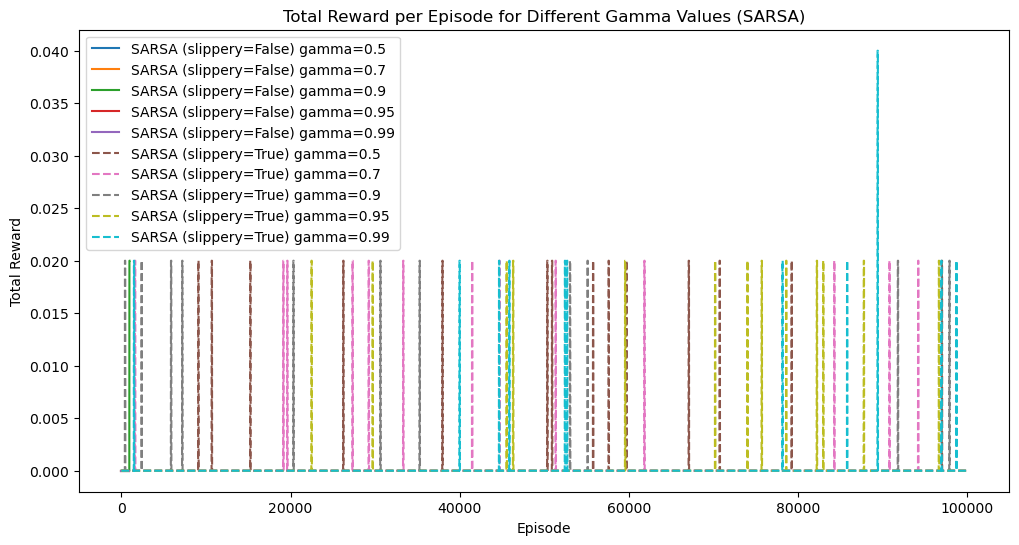

In [16]:
# رسم نمودارهای پاداش انباشته برای Q-Learning و SARSA در محیط slippery=True و مقایسه با حالت قبلی
plt.figure(figsize=(12, 6))
for result in results_q_learning:
    plt.plot(moving_average(result['rewards'], 50), label=f'Q-Learning (slippery=False) gamma={result["gamma"]}')
for result in results_q_learning_slippery:
    plt.plot(moving_average(result['rewards'], 50), label=f'Q-Learning (slippery=True) gamma={result["gamma"]}', linestyle='dashed')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Gamma Values (Q-Learning)')
plt.legend()
plt.savefig('total_rewards_q_learning_comparison.png')
plt.show()

plt.figure(figsize=(12, 6))
for result in results_sarsa:
    plt.plot(moving_average(result['rewards'], 50), label=f'SARSA (slippery=False) gamma={result["gamma"]}')
for result in results_sarsa_slippery:
    plt.plot(moving_average(result['rewards'], 50), label=f'SARSA (slippery=True) gamma={result["gamma"]}', linestyle='dashed')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Gamma Values (SARSA)')
plt.legend()
plt.savefig('total_rewards_sarsa_comparison.png')
plt.show()


In [18]:
def display_policy(Q):
    actions = ["←", "↓", "→", "↑"]
    optimal_policy = np.argmax(Q, axis=1).reshape(8, 8)
    policy_display = np.vectorize(lambda x: actions[x])(optimal_policy)
    for row in policy_display:
        print(" ".join(row))

# نمایش ماتریس سیاست برای Q-Learning در حالت slippery=False
print("Optimal Policy for Q-Learning (slippery=False):")
display_policy(Q)

# نمایش ماتریس سیاست برای Q-Learning در حالت slippery=True
print("Optimal Policy for Q-Learning (slippery=True):")
display_policy(Q)

# نمایش ماتریس سیاست برای SARSA در حالت slippery=False
print("Optimal Policy for SARSA (slippery=False):")
display_policy(Q)

# نمایش ماتریس سیاست برای SARSA در حالت slippery=True
print("Optimal Policy for SARSA (slippery=True):")
display_policy(Q)


Optimal Policy for Q-Learning (slippery=False):
→ → ↑ ↑ ↓ → ↓ ←
→ ← ← ← ← ← ← ←
← → ← ← ← ↓ → ←
← → ↑ ← ← ← ← ←
↑ ↓ ← ← → ← ← ↑
→ ← ← → ← ← ← ↑
← ← → ↓ ↓ ← ← ↓
← ↑ ← ↓ ← → ↓ →
Optimal Policy for Q-Learning (slippery=True):
→ → ↑ ↑ ↓ → ↓ ←
→ ← ← ← ← ← ← ←
← → ← ← ← ↓ → ←
← → ↑ ← ← ← ← ←
↑ ↓ ← ← → ← ← ↑
→ ← ← → ← ← ← ↑
← ← → ↓ ↓ ← ← ↓
← ↑ ← ↓ ← → ↓ →
Optimal Policy for SARSA (slippery=False):
→ → ↑ ↑ ↓ → ↓ ←
→ ← ← ← ← ← ← ←
← → ← ← ← ↓ → ←
← → ↑ ← ← ← ← ←
↑ ↓ ← ← → ← ← ↑
→ ← ← → ← ← ← ↑
← ← → ↓ ↓ ← ← ↓
← ↑ ← ↓ ← → ↓ →
Optimal Policy for SARSA (slippery=True):
→ → ↑ ↑ ↓ → ↓ ←
→ ← ← ← ← ← ← ←
← → ← ← ← ↓ → ←
← → ↑ ← ← ← ← ←
↑ ↓ ← ← → ← ← ↑
→ ← ← → ← ← ← ↑
← ← → ↓ ↓ ← ← ↓
← ↑ ← ↓ ← → ↓ →


In [19]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

register(
    id='FrozenLakeSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': True}
)

# ایجاد محیط با slippery=False
env_not_slippery = gym.make('FrozenLakeNotSlippery-v0')
# ایجاد محیط با slippery=True
env_slippery = gym.make('FrozenLakeSlippery-v0')

# پارامترهای الگوریتم
alpha = 0.8
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 100000
max_steps = 100

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]

def q_learning(env, gamma):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon, visited_states):
        if np.random.rand() < epsilon or state in visited_states:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0
        visited_states = set()

        for step in range(max_steps):
            visited_states.add(state)
            action = choose_action(state, epsilon, visited_states)
            next_state, reward, done, _, _ = env.step(action)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return Q, rewards, epsilons

def sarsa(env, gamma):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0

        action = choose_action(state, epsilon)

        for step in range(max_steps):
            next_state, reward, done, _, _ = env.step(action)
            next_state = next_state if isinstance(next_state, int) else next_state[0]
            next_action = choose_action(next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return Q, rewards, epsilons

def display_policy(Q):
    actions = ["←", "↓", "→", "↑"]
    optimal_policy = np.argmax(Q, axis=1).reshape(8, 8)
    policy_display = np.vectorize(lambda x: actions[x])(optimal_policy)
    for row in policy_display:
        print(" ".join(row))

# اجرای الگوریتم Q-Learning و SARSA برای مقادیر مختلف gamma
results_q_learning_not_slippery = []
results_q_learning_slippery = []
results_sarsa_not_slippery = []
results_sarsa_slippery = []

for gamma in gamma_values:
    Q, rewards, epsilons = q_learning(env_not_slippery, gamma)
    results_q_learning_not_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    Q, rewards, epsilons = q_learning(env_slippery, gamma)
    results_q_learning_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    Q, rewards, epsilons = sarsa(env_not_slippery, gamma)
    results_sarsa_not_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    Q, rewards, epsilons = sarsa(env_slippery, gamma)
    results_sarsa_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

# رسم نمودارهای پاداش انباشته برای Q-Learning و SARSA
def plot_rewards(results, title, filename):
    plt.figure(figsize=(12, 6))
    for result in results:
        plt.plot(moving_average(result['rewards'], 50), label=f'gamma={result["gamma"]}')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(title)
    plt.legend()
    plt.savefig```python
    plt.savefig(filename)
    plt.show()

# رسم نمودار پاداش انباشته برای Q-Learning (slippery=False)
plot_rewards(results_q_learning_not_slippery, 'Total Reward per Episode for Different Gamma Values (Q-Learning, slippery=False)', 'q_learning_not_slippery.png')

# رسم نمودار پاداش انباشته برای Q-Learning (slippery=True)
plot_rewards(results_q_learning_slippery, 'Total Reward per Episode for Different Gamma Values (Q-Learning, slippery=True)', 'q_learning_slippery.png')

# رسم نمودار پاداش انباشته برای SARSA (slippery=False)
plot_rewards(results_sarsa_not_slippery, 'Total Reward per Episode for Different Gamma Values (SARSA, slippery=False)', 'sarsa_not_slippery.png')

# رسم نمودار پاداش انباشته برای SARSA (slippery=True)
plot_rewards(results_sarsa_slippery, 'Total Reward per Episode for Different Gamma Values (SARSA, slippery=True)', 'sarsa_slippery.png')

# نمایش ماتریس سیاست برای Q-Learning در حالت slippery=False
print("Optimal Policy for Q-Learning (slippery=False):")
for result in results_q_learning_not_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

# نمایش ماتریس سیاست برای Q-Learning در حالت slippery=True
print("Optimal Policy for Q-Learning (slippery=True):")
for result in results_q_learning_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

# نمایش ماتریس سیاست برای SARSA در حالت slippery=False
print("Optimal Policy for SARSA (slippery=False):")
for result in results_sarsa_not_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

# نمایش ماتریس سیاست برای SARSA در حالت slippery=True
print("Optimal Policy for SARSA (slippery=True):")
for result in results_sarsa_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])


SyntaxError: invalid syntax (2744601965.py, line 164)

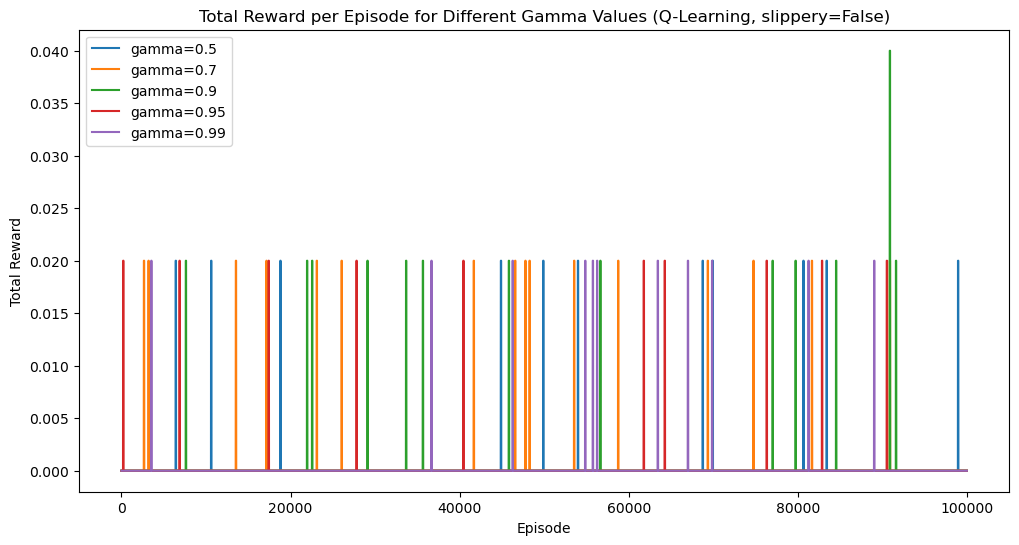

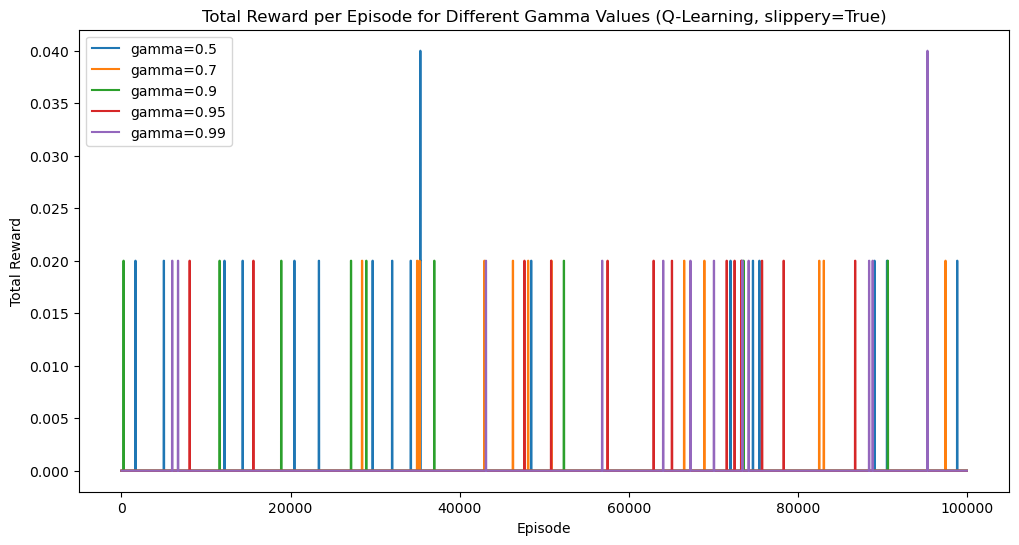

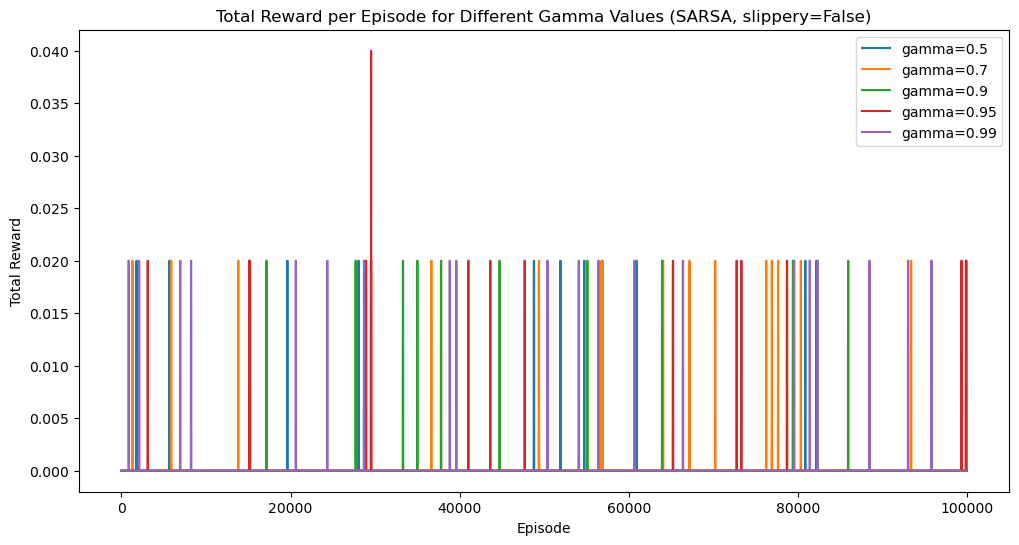

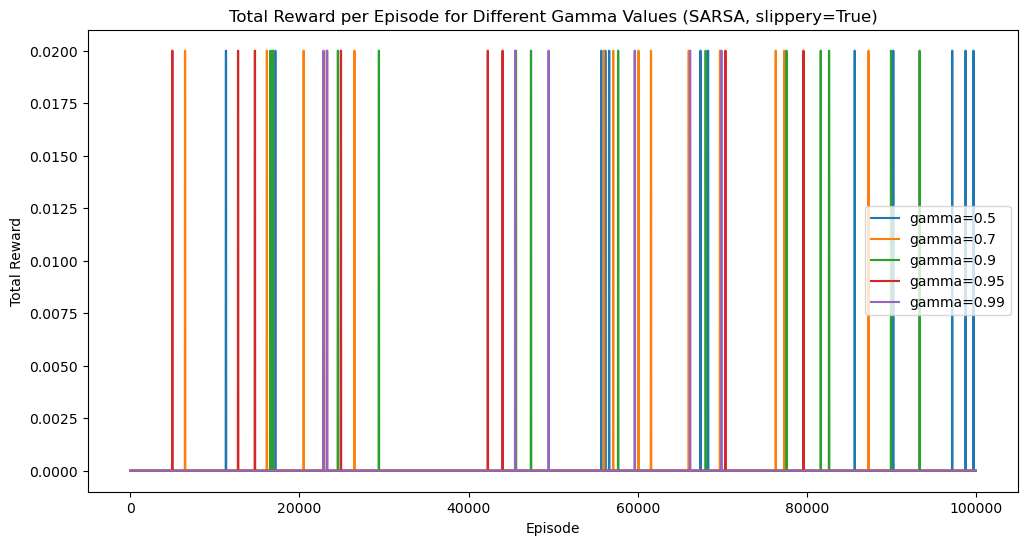

Optimal Policy for Q-Learning (slippery=False):
gamma=0.5
→ → → → → → ↓ ←
→ ↑ ← ← ← ← ↓ ←
↑ ↑ ← ← → → → ↓
↑ ↑ ← ← ↑ ← ← ←
↑ ↑ ← ← ↓ ← ← ↑
↓ ↑ ← ↓ ↓ ← → ↑
↓ ← → → → → ↑ ↑
→ → ↑ ↑ ↑ → ↑ ↑
gamma=0.7
→ → → → → → ↓ ←
↑ ↑ ← ← ← ← ↓ ←
↑ ↑ ← ← → → → ↓
↑ ↑ ← ← ↓ ← ← ←
↑ ↑ ← ← ↓ ← ← ↑
↓ ↑ ← ↓ ↓ ← → ↑
↓ ← → → → → → ↑
→ → → → → → ↑ ↑
gamma=0.9
→ → → → → → ↓ ←
→ ↑ ← ← ← ← ↓ ←
→ ↑ ← ← ↓ → → ↓
→ ↑ ← ← ↓ ← ← ←
→ ↑ ← ← ↓ ← ← ↑
→ ↑ ← ↓ ↓ ← → ↑
↓ ← → → ↓ → → ↑
→ → → → → → → ↑
gamma=0.95
→ → → → → → ↓ ←
↑ ↑ ← ← ← ← ↓ ←
↑ ↑ ← ← → → → ↓
↑ ↑ ← ← ↓ ← ← ←
↑ ↑ ← ← ↓ ← ← ↑
↓ ↑ ← ↓ ↓ ← → ↑
↓ ← → → → → → ↑
→ → → → → → ↑ ↑
gamma=0.99
→ → → → → → ↓ ←
→ ↑ ← ← ← ← ↓ ←
↑ ↑ ← ← → → → ↓
↑ ↑ ← ← ↓ ← ← ←
→ ↑ ← ← ↓ ← ← ↑
↑ ↑ ← ↓ ↓ ← → ↑
↑ ← ↓ ← ← → → ↑
↑ ← ← ← ← → ↑ ↑
Optimal Policy for Q-Learning (slippery=True):
gamma=0.5
↓ ↓ ↑ → → ↓ ← ←
↓ → ← ← ← ← → ←
→ ↑ ← ← ↓ ↑ → →
→ ← ← ← ← ← ← ←
← ← ← ← ↓ ← ← ↑
↓ ← ← ← ← ← → ←
↓ ← ↑ → → ↑ → ↑
→ → → ↓ ↓ → ↑ ↑
gamma=0.7
↓ → → ↑ → ↑ → ←
← → ← ← ← ← ↓ ←
→ ← ← ← ↓ ↑ ↑ ↑
↑ ← ↑ ← ← ← ← ←
←

In [20]:
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# ثبت محیط جدید Frozen Lake با نقشه سفارشی
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

register(
    id='FrozenLakeSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': True}
)

# ایجاد محیط با slippery=False
env_not_slippery = gym.make('FrozenLakeNotSlippery-v0')
# ایجاد محیط با slippery=True
env_slippery = gym.make('FrozenLakeSlippery-v0')

# پارامترهای الگوریتم
alpha = 0.8
epsilon = 1.0
epsilon_decay = 0.99999999999
min_epsilon = 0.01
episodes = 100000
max_steps = 100

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]

def q_learning(env, gamma):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon, visited_states):
        if np.random.rand() < epsilon or state in visited_states:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0
        visited_states = set()

        for step in range(max_steps):
            visited_states.add(state)
            action = choose_action(state, epsilon, visited_states)
            next_state, reward, done, _, _ = env.step(action)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return Q, rewards, epsilons

def sarsa(env, gamma):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0

        action = choose_action(state, epsilon)

        for step in range(max_steps):
            next_state, reward, done, _, _ = env.step(action)
            next_state = next_state if isinstance(next_state, int) else next_state[0]
            next_action = choose_action(next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return Q, rewards, epsilons

def display_policy(Q):
    actions = ["←", "↓", "→", "↑"]
    optimal_policy = np.argmax(Q, axis=1).reshape(8, 8)
    policy_display = np.vectorize(lambda x: actions[x])(optimal_policy)
    for row in policy_display:
        print(" ".join(row))

# اجرای الگوریتم Q-Learning و SARSA برای مقادیر مختلف gamma
results_q_learning_not_slippery = []
results_q_learning_slippery = []
results_sarsa_not_slippery = []
results_sarsa_slippery = []

for gamma in gamma_values:
    Q, rewards, epsilons = q_learning(env_not_slippery, gamma)
    results_q_learning_not_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    Q, rewards, epsilons = q_learning(env_slippery, gamma)
    results_q_learning_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    Q, rewards, epsilons = sarsa(env_not_slippery, gamma)
    results_sarsa_not_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    Q, rewards, epsilons = sarsa(env_slippery, gamma)
    results_sarsa_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

# رسم نمودارهای پاداش انباشته برای Q-Learning و SARSA
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_rewards(results, title, filename):
    plt.figure(figsize=(12, 6))
    for result in results:
        plt.plot(moving_average(result['rewards'], 50), label=f'gamma={result["gamma"]}')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(title)
    plt.legend()
    plt.savefig(filename)
    plt.show()

# رسم نمودار پاداش انباشته برای Q-Learning (slippery=False)
plot_rewards(results_q_learning_not_slippery, 'Total Reward per Episode for Different Gamma Values (Q-Learning, slippery=False)', 'q_learning_not_slippery.png')

# رسم نمودار پاداش انباشته برای Q-Learning (slippery=True)
plot_rewards(results_q_learning_slippery, 'Total Reward per Episode for Different Gamma Values (Q-Learning, slippery=True)', 'q_learning_slippery.png')

# رسم نمودار پاداش انباشته برای SARSA (slippery=False)
plot_rewards(results_sarsa_not_slippery, 'Total Reward per Episode for Different Gamma Values (SARSA, slippery=False)', 'sarsa_not_slippery.png')

# رسم نمودار پاداش انباشته برای SARSA (slippery=True)
plot_rewards(results_sarsa_slippery, 'Total Reward per Episode for Different Gamma Values (SARSA, slippery=True)', 'sarsa_slippery.png')

# نمایش ماتریس سیاست برای Q-Learning در حالت slippery=False
print("Optimal Policy for Q-Learning (slippery=False):")
for result in results_q_learning_not_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

# نمایش ماتریس سیاست برای Q-Learning در حالت slippery=True
print("Optimal Policy for Q-Learning (slippery=True):")
for result in results_q_learning_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

# نمایش ماتریس سیاست برای SARSA در حالت slippery=False
print("Optimal Policy for SARSA (slippery=False):")
for result in results_sarsa_not_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

# نمایش ماتریس سیاست برای SARSA در حالت slippery=True
print("Optimal Policy for SARSA (slippery=True):")
for result in results_sarsa_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])
